<a href="https://colab.research.google.com/github/192110218/PROJECT/blob/main/Athelets_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ATHELETS/AtheletsPerformance/Athelets/dataset/summary.csv")
data.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


#### Information about the dataset

- Name: The name of the basketball player.
- GamesPlayed: Number of games played by the athlete.
- MinutesPlayed: Total minutes played by the athlete in the specified games.
- PointsPerGame: Average points scored per game by the athlete.
- FieldGoalsMade: Number of successful field goals made by the athlete.
- FieldGoalsAttempt: Total attempts at field goals made by the athlete.
- FieldGoalPercent: The percentage of successful field goals made by the athlete.
- 3PointMade: Number of successful 3-point shots made by the athlete.
- 3PointAttempt: Total attempts at 3-point shots made by the athlete.
- 3PointPercent: The percentage of successful 3-point shots made by the athlete.
- FreeThrowMade: Number of successful free throws made by the athlete.
- FreeThrowAttempt: Total attempts at free throws made by the athlete.
- FreeThrowPercent: The percentage of successful free throws made by the athlete.
- OffensiveRebounds: Number of offensive rebounds by the athlete.
- DefensiveRebounds: Number of defensive rebounds by the athlete.
- Rebounds: Total number of rebounds by the athlete.
- Assists: Number of assists made by the athlete.
- Steals: Number of steals made by the athlete.
- Blocks: Number of blocks made by the athlete.
- Turnovers: Number of turnovers by the athlete.
- Target: The target variable indicating the performance category (e.g., 0 for low performance, 1 for high performance).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

#### Descriptive Statistics

In [ ]:
data.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [ ]:
data["Target"].value_counts()

1    831
0    509
Name: Target, dtype: int64

In [ ]:
names = data["Name"]
data.drop(["Name"],inplace=True,axis=1)

#### Correlation Matrix

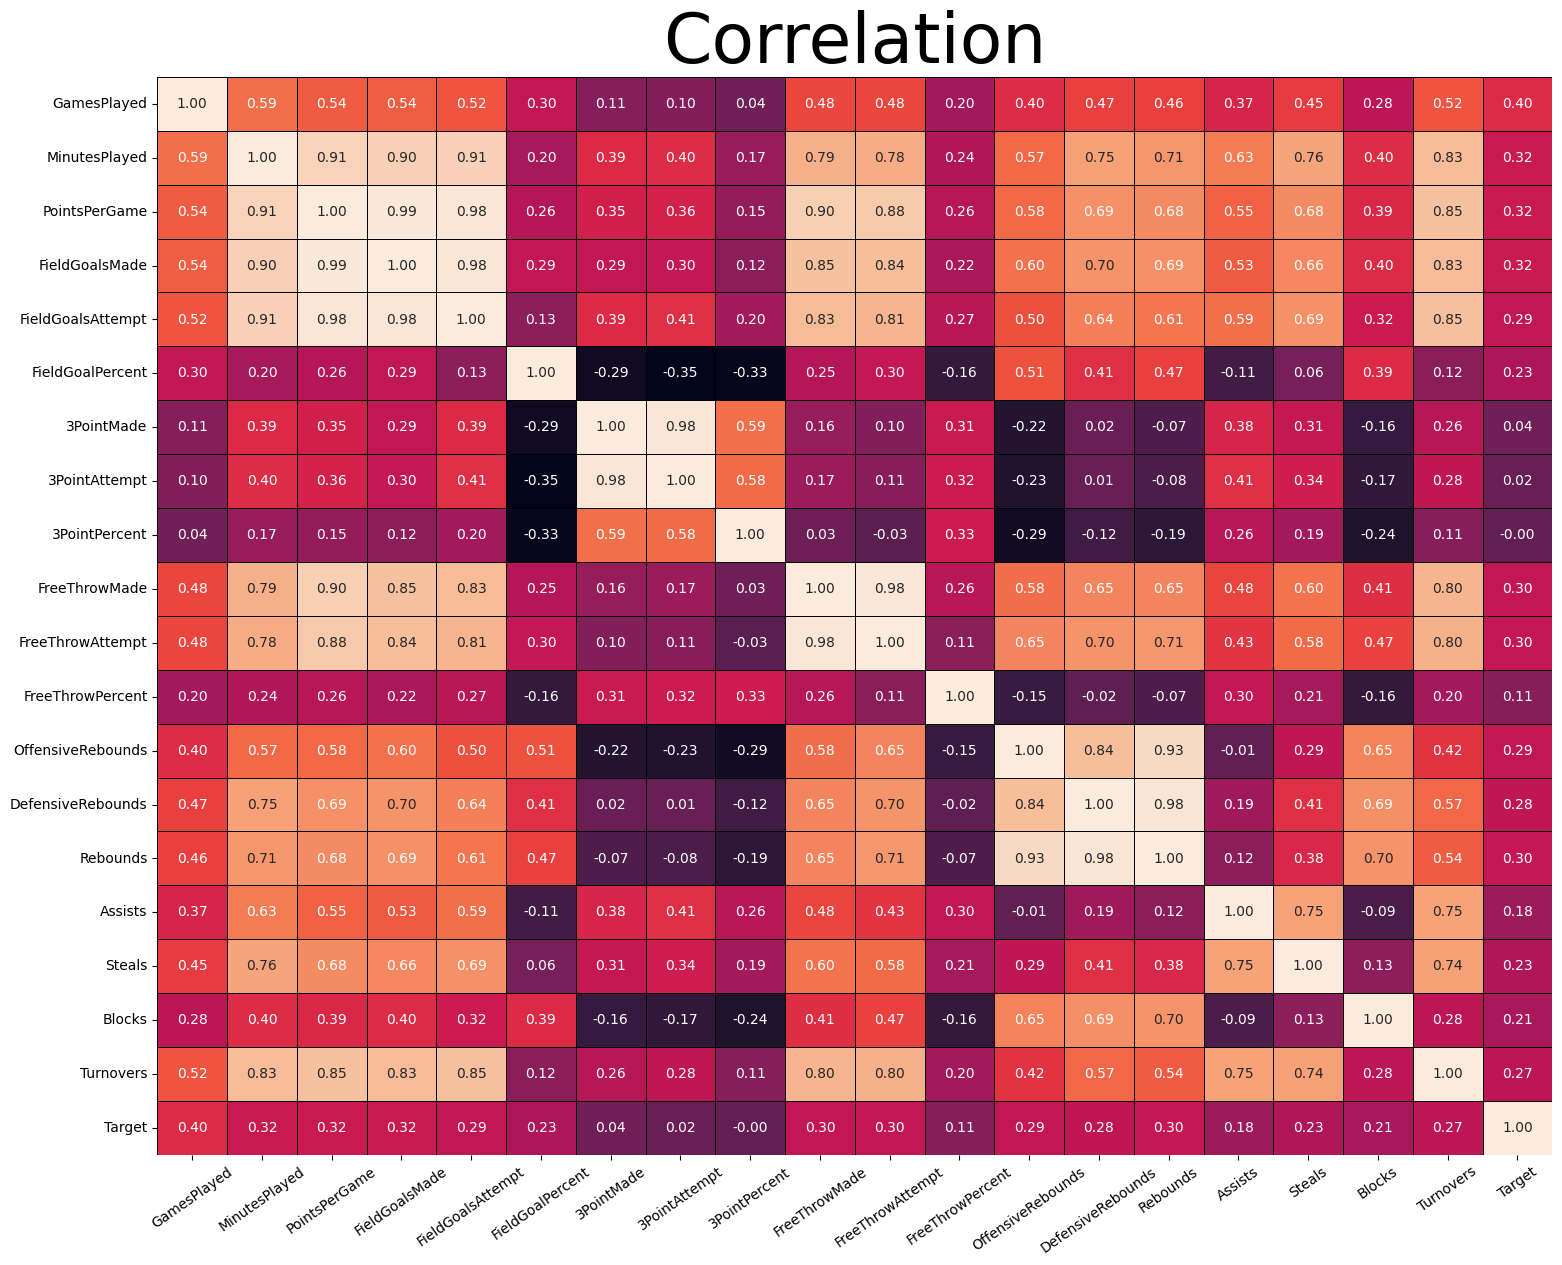

In [ ]:
import seaborn as sns
plt.subplots(figsize=(18,14))
sns.heatmap(data.corr(),annot=True,linewidths=0.4,linecolor="black",fmt="1.2f",cbar=False)
plt.title("Correlation",fontsize=50)
plt.xticks(rotation=35)
plt.show()

In [ ]:
targetLikes = ["GamesPlayed","MinutesPlayed","PointsPerGame","FieldGoalsMade","FieldGoalsAttempt","FreeThrowMade","FreeThrowAttempt"]

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio

init_notebook_mode(True)
#I will round floats for better visualize
rounded_data = data.apply(lambda x : round(x))
rounded_data.head()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,36,27.0,7.0,3.0,8.0,35.0,0.0,2.0,25.0,2.0,2.0,70.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,0
1,35,27.0,7.0,2.0,7.0,30.0,1.0,3.0,24.0,3.0,3.0,76.0,0.0,2.0,2.0,4.0,1.0,0.0,2.0,0
2,74,15.0,5.0,2.0,5.0,42.0,0.0,2.0,24.0,1.0,1.0,67.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0
3,58,12.0,6.0,2.0,6.0,43.0,0.0,0.0,23.0,1.0,1.0,69.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1
4,48,12.0,4.0,2.0,3.0,52.0,0.0,0.0,0.0,1.0,2.0,67.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1


### Data Visualization

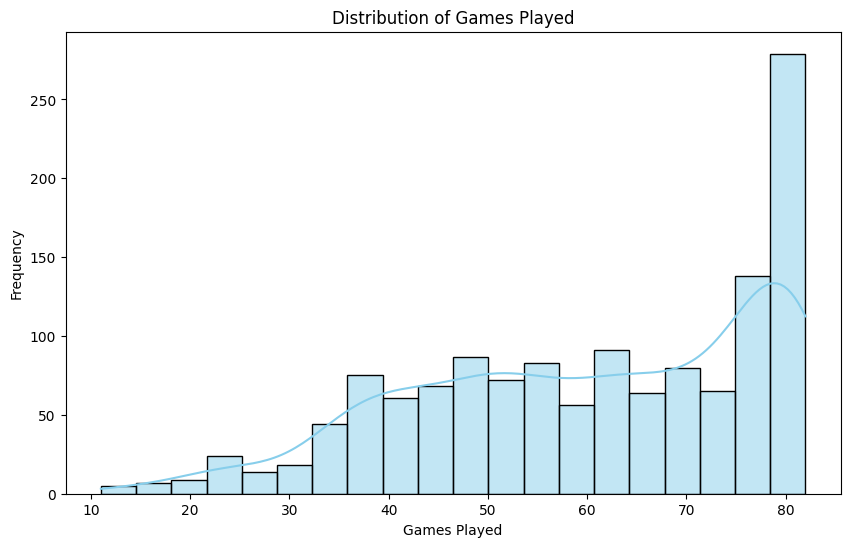

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['GamesPlayed'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Games Played')
plt.xlabel('Games Played')
plt.ylabel('Frequency')
plt.show()

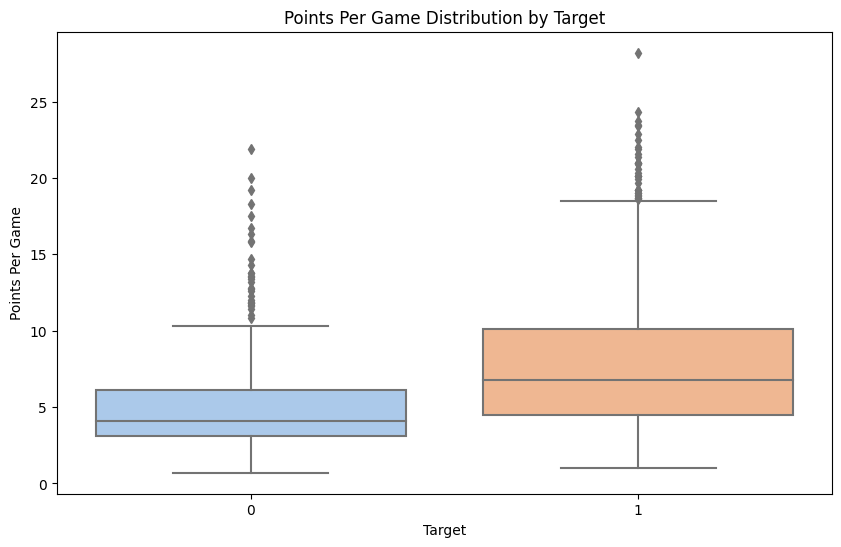

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='PointsPerGame', data=data, palette='pastel')
plt.title('Points Per Game Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Points Per Game')
plt.show()

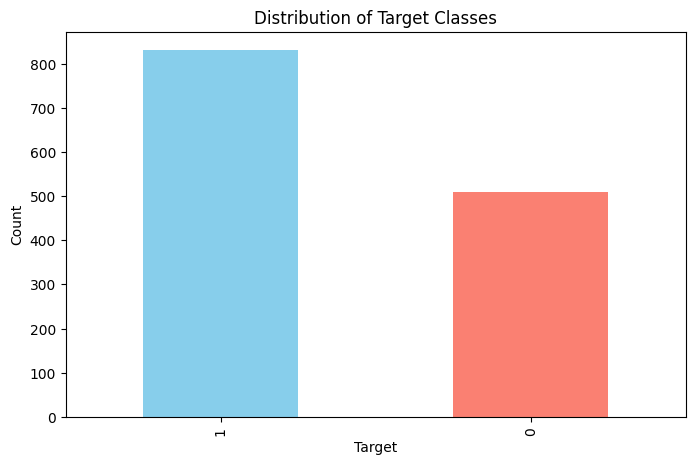

In [ ]:
plt.figure(figsize=(8, 5))
data['Target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

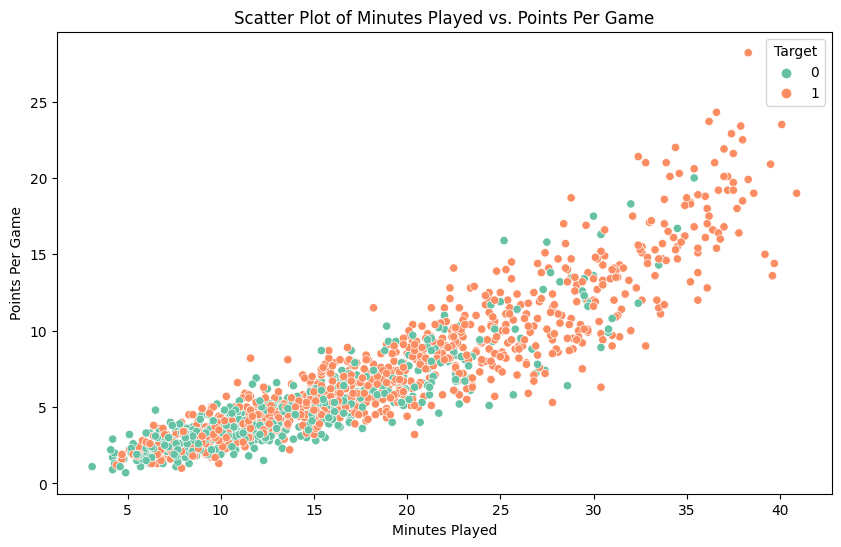

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinutesPlayed', y='PointsPerGame', data=data, hue='Target', palette='Set2')
plt.title('Scatter Plot of Minutes Played vs. Points Per Game')
plt.xlabel('Minutes Played')
plt.ylabel('Points Per Game')
plt.legend(title='Target')
plt.show()

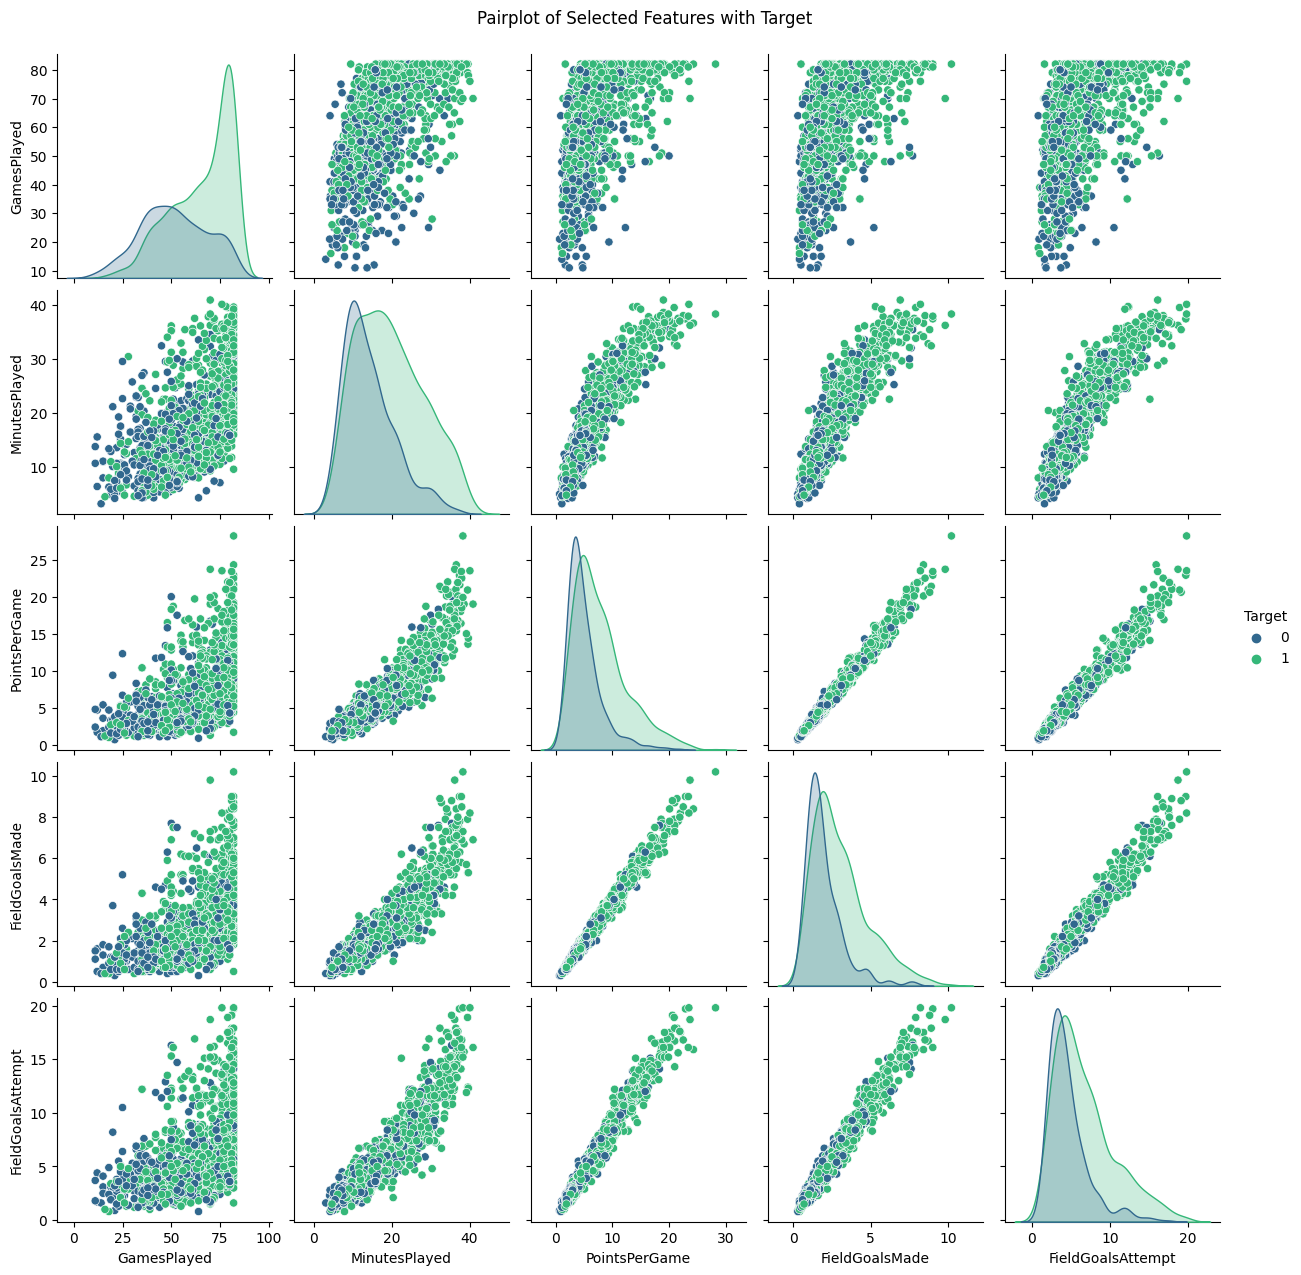

In [ ]:
selected_features = ['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsMade', 'FieldGoalsAttempt', 'Target']
sns.pairplot(data[selected_features], height=2.5, diag_kind='kde', hue='Target', palette='viridis')
plt.suptitle('Pairplot of Selected Features with Target', y=1.02)
plt.show()


### Data Preprocessing & Data Preparation

In [ ]:
targetLikes

['GamesPlayed',
 'MinutesPlayed',
 'PointsPerGame',
 'FieldGoalsMade',
 'FieldGoalsAttempt',
 'FreeThrowMade',
 'FreeThrowAttempt']

In [ ]:
X = data[targetLikes]
y = data["Target"]

In [ ]:
X

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FreeThrowMade,FreeThrowAttempt
0,36,27.4,7.4,2.6,7.6,1.6,2.3
1,35,26.9,7.2,2.0,6.7,2.6,3.4
2,74,15.3,5.2,2.0,4.7,0.9,1.3
3,58,11.6,5.7,2.3,5.5,0.9,1.3
4,48,11.5,4.5,1.6,3.0,1.3,1.9
...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,1.2,1.5
1336,68,12.6,3.9,1.5,4.1,0.8,1.0
1337,43,12.1,5.4,2.2,3.9,1.0,1.6
1338,52,12.0,4.5,1.7,3.8,1.2,1.8


### Resampling Technique for Better Performance of Models

In [ ]:
from imblearn.combine import SMOTETomek


smothy = SMOTETomek(random_state = 42)
smothy.fit(X,y)
X_smothy,y_smothy = smothy.fit_resample(X,y)

In [ ]:
print("New Counts After Combining Under and Over Sampling")
print(y_smothy[y_smothy==0].value_counts())
print(y_smothy[y_smothy==1].value_counts())

New Counts After Combining Under and Over Sampling
0    754
Name: Target, dtype: int64
1    754
Name: Target, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
x = mms.fit_transform(X_smothy)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y_smothy,test_size=0.2,random_state=67)

### Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#### Title : XGBoost vs KNN

##### XGBoost

In [ ]:
from xgboost import XGBClassifier

# Create XGBoost model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(x_train, y_train)

# Evaluate the model
xgb_accuracy = accuracy_score(xgb_model.predict(x_test), y_test)
print(f"XGBoost Accuracy: {xgb_accuracy}")


XGBoost Accuracy: 0.7847682119205298


##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(x_train, y_train)

# Evaluate the model
knn_accuracy = accuracy_score(knn_model.predict(x_test), y_test)
print(f"KNN Accuracy: {knn_accuracy}")


KNN Accuracy: 0.695364238410596


In [ ]:
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")

XGBoost Accuracy: 0.7847682119205298
KNN Accuracy: 0.695364238410596


#### Title: XGBoost vs Logistic Regression

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(x_train, y_train)

# Evaluate the model
logreg_accuracy = accuracy_score(logreg_model.predict(x_test), y_test)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")


Logistic Regression Accuracy: 0.7152317880794702


In [ ]:
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

XGBoost Accuracy: 0.7847682119205298
Logistic Regression Accuracy: 0.7152317880794702


#### Title: XGBoost vs SVM

##### SVM

In [ ]:
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC()

# Train the model
svm_model.fit(x_train, y_train)

# Evaluate the model
svm_accuracy = accuracy_score(svm_model.predict(x_test), y_test)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.7317880794701986


In [ ]:
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

XGBoost Accuracy: 0.7847682119205298
SVM Accuracy: 0.7317880794701986


##### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(x_train, y_train)

# Evaluate the model
rf_accuracy = accuracy_score(rf_model.predict(x_test), y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.7715231788079471


##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost model
adaboost_model = AdaBoostClassifier()

# Train the model
adaboost_model.fit(x_train, y_train)

# Evaluate the model
adaboost_accuracy = accuracy_score(adaboost_model.predict(x_test), y_test)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")


AdaBoost Accuracy: 0.7450331125827815


##### Decision Tree Classiifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(x_train, y_train)

# Evaluate the model
dt_accuracy = accuracy_score(dt_model.predict(x_test), y_test)
print(f"Decision Tree Accuracy: {dt_accuracy}")


Decision Tree Accuracy: 0.7450331125827815


#### Title: XGBoost vs Convolutional Neural Network

##### CNN

Epoch 1/10
27/27 [==============================] - 2s 18ms/step - loss: nan - accuracy: 0.3967 - val_loss: nan - val_accuracy: 0.3442
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.3921 - val_loss: nan - val_accuracy: 0.3442
Epoch 3/10
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3921 - val_loss: nan - val_accuracy: 0.3442
Epoch 4/10
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3921 - val_loss: nan - val_accuracy: 0.3442
Epoch 5/10
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3921 - val_loss: nan - val_accuracy: 0.3442
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3921 - val_loss: nan - val_accuracy: 0.3442
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.3921 - val_loss: nan - val_accuracy: 0.3442
Epoch 8/10
27/27 [==============================] - 0s 8ms/st

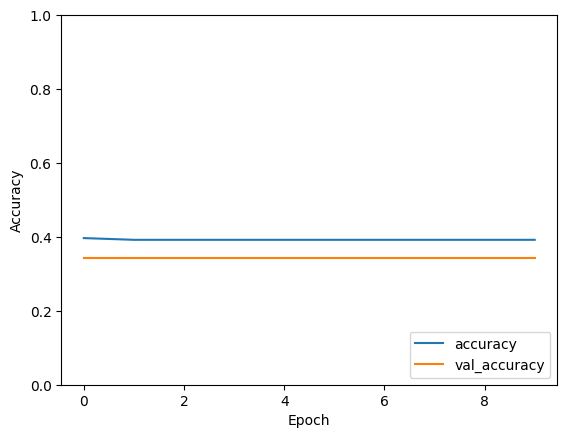

9/9 [==============================] - 0s 4ms/step
Neural Network Accuracy: 0.3694029850746269


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming your data is in the 'X' dataframe and the target is in the 'y' Series
X = data.drop('Target', axis=1)  # Features
y = data['Target']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Predict on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the model
cnn_accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {cnn_accuracy}")


In [ ]:
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"CNN Accuracy: {cnn_accuracy}")

XGBoost Accuracy: 0.7847682119205298
CNN Accuracy: 0.3694029850746269


### Inference

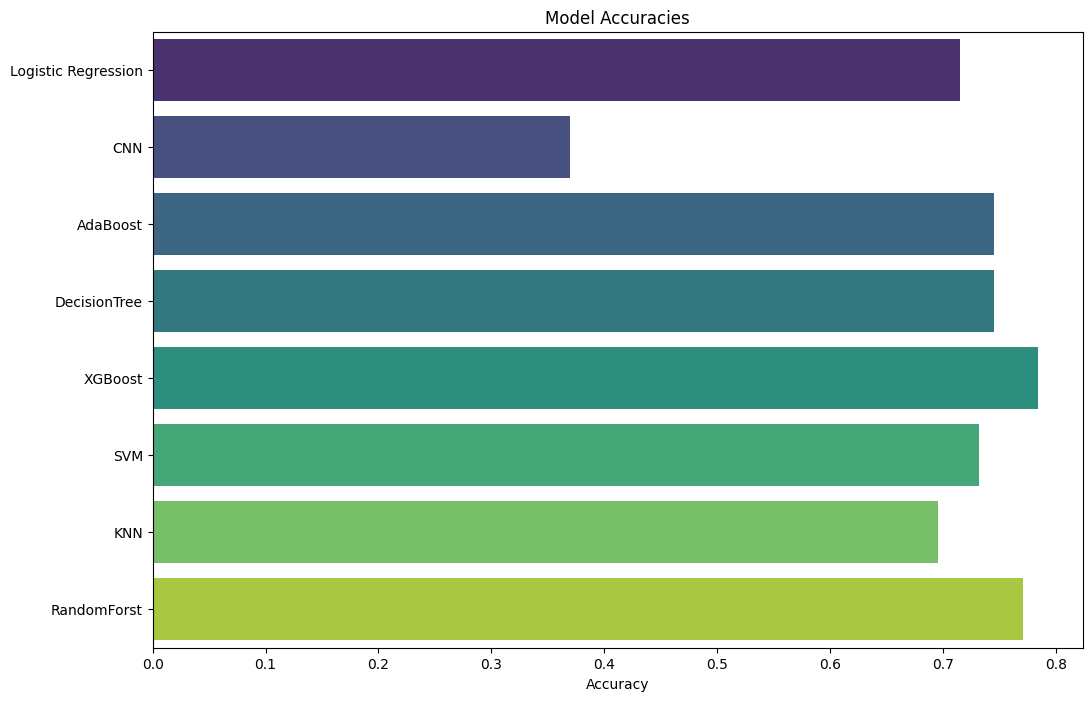

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have accuracy variables like lorgreg_accuracy, cnn_accuracy, rf_accuracy, etc.

model_names = ["Logistic Regression", "CNN",  "AdaBoost","DecisionTree","XGBoost","SVM","KNN","RandomForst"]
accuracies = [logreg_accuracy, cnn_accuracy, adaboost_accuracy,dt_accuracy,xgb_accuracy,svm_accuracy,knn_accuracy,rf_accuracy]  # Add other accuracies accordingly

plt.figure(figsize=(12, 8))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.title("Model Accuracies")
plt.xlabel("Accuracy")
plt.show()
